In [1]:
import sagemaker
import uuid

sagemaker_session = sagemaker.Session()
print('SageMaker version: ' + sagemaker.__version__)

bucket = sagemaker_session.default_bucket()
prefix = 'sagemaker/cifar_10_ptl'

role = sagemaker.get_execution_role()
checkpoint_suffix = str(uuid.uuid4())[:8]
checkpoint_s3_path = 's3://{}/checkpoint-{}'.format(bucket, checkpoint_suffix)

print('Checkpointing Path: {}'.format(checkpoint_s3_path))

SageMaker version: 2.74.0
Checkpointing Path: s3://sagemaker-us-west-2-113935906496/checkpoint-4ff6d124


In [2]:
import os
import subprocess

instance_type = 'local'

if subprocess.call('nvidia-smi') == 0:
    ## Set type to GPU if one is present
    instance_type = 'local_gpu'
    
print("Instance type = " + instance_type)

Instance type = local


In [3]:
from utils_cifar import get_train_data_loader, get_test_data_loader, imshow, classes

trainloader = get_train_data_loader()
testloader = get_test_data_loader()

Files already downloaded and verified
Files already downloaded and verified


      car      ship      deer      ship


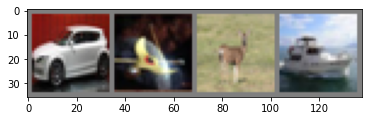

In [4]:
import numpy as np
import torchvision, torch

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%9s' % classes[labels[j]] for j in range(4)))

In [5]:
inputs = sagemaker_session.upload_data(path='data', bucket=bucket, key_prefix='data/cifar10')

In [6]:
use_spot_instances = True
max_run=1200
max_wait = 1200 if use_spot_instances else None

In [7]:
from sagemaker.pytorch import PyTorch

hyperparameters = {'epochs': 4, 'batch_size' : 64 }

spot_estimator = PyTorch(entry_point='cifar_10_ptl.py',
                         source_dir = './source_dir',
                            role=role,
                            framework_version='1.7.1',
                            py_version='py3',
                            instance_count=1,
                            instance_type='ml.p3.8xlarge',
                            base_job_name='cifar10-pytorch-spot-1',
                            checkpoint_s3_uri=checkpoint_s3_path,
                            debugger_hook_config=False,
                            use_spot_instances=use_spot_instances,
                            max_run=max_run,
                            max_wait=max_wait)

In [8]:
spot_estimator.fit(inputs)

2022-02-16 03:24:24 Starting - Starting the training job...
2022-02-16 03:24:47 Starting - Launching requested ML instancesProfilerReport-1644981864: InProgress
.........
2022-02-16 03:26:08 Starting - Preparing the instances for training............
2022-02-16 03:28:25 Downloading - Downloading input data......
2022-02-16 03:29:08 Training - Downloading the training image......bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2022-02-16 03:30:15,604 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2022-02-16 03:30:15,647 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2022-02-16 03:30:17,064 sagemaker_pytorch_container.training INFO     Invoking user training script.
2022-02-16 03:30:17,466 sagemaker-training-toolkit INFO     Installing dependencies from requirements.txt:
/opt/conda/bin/python3.6 -m pip install -r requirements.txt


  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-py3-none-any.whl size=3161 sha256=87b46654fb7b2f5d4bc40a4fc96f80d790bb7f82515fecfff39825fbed98bfeb
  Stored in directory: /root/.cache/pip/wheels/6a/f5/9c/f8331a854f7a8739cf0e74c13854e4dd7b1af11b04fe1dde13
Successfully built idna-ssl
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.0.1
    Uninstalling importlib-metadata-4.0.1:
      Successfully uninstalled importlib-metadata-4.0.1
  Attempting uninstall: setuptools
    Found existing installation: setuptools 49.6.0.post20210108
    Uninstalling setuptools-49.6.0.post20210108:
      Successfully uninstalled setuptools-49.6.0.post20210108
2022-02-16 03:30:33,003 sagemaker-training-toolkit INFO     Invoking user script
Training Env:
{
    "additional_framework_parameters": {},
    "channel_input_dirs": {
        "training": "/opt/ml/input/data/training"
    },
    "current_host": "algo-1",
    "framework_module": "sagemaker_pytorch_cont

#015Validating: 100%|██████████| 157/157 [00:15<00:00, 10.02it/s]#033[A#015Epoch 0: 100%|█████████▉| 780/782 [01:24<00:00,  9.26it/s, loss=2.1, v_num=0, val_loss=2.080, val_acc=0.241]
#015                                                             #033[A#015Epoch 0: 100%|██████████| 782/782 [01:24<00:00,  9.29it/s, loss=2.1, v_num=0, val_loss=2.080, val_acc=0.241]#015Epoch 0:   0%|          | 0/782 [00:00<?, ?it/s, loss=2.1, v_num=0, val_loss=2.080, val_acc=0.241]          #015Epoch 1:   0%|          | 0/782 [00:00<?, ?it/s, loss=2.1, v_num=0, val_loss=2.080, val_acc=0.241]#015Epoch 1:   1%|▏         | 10/782 [00:01<01:43,  7.49it/s, loss=2.1, v_num=0, val_loss=2.080, val_acc=0.241]#015Epoch 1:   1%|▏         | 10/782 [00:01<01:43,  7.48it/s, loss=2.04, v_num=0, val_loss=2.080, val_acc=0.241]#015Epoch 1:   3%|▎         | 20/782 [00:02<01:34,  8.08it/s, loss=2.04, v_num=0, val_loss=2.080, val_acc=0.241]#015Epoch 1:   3%|▎         | 20/782 [00:02<01:34,  8.08it/s, loss=2.02, v_num=0, va

#015Validating: 100%|██████████| 157/157 [00:14<00:00, 10.53it/s]#033[A#015Epoch 1: 100%|█████████▉| 780/782 [01:23<00:00,  9.38it/s, loss=1.72, v_num=0, val_loss=2.280, val_acc=0.357]
#015                                                             #033[A#015Epoch 1: 100%|██████████| 782/782 [01:23<00:00,  9.41it/s, loss=1.72, v_num=0, val_loss=2.280, val_acc=0.357]#015Epoch 1:   0%|          | 0/782 [00:00<?, ?it/s, loss=1.72, v_num=0, val_loss=2.280, val_acc=0.357]          #015Epoch 2:   0%|          | 0/782 [00:00<?, ?it/s, loss=1.72, v_num=0, val_loss=2.280, val_acc=0.357]#015Epoch 2:   1%|▏         | 10/782 [00:01<01:38,  7.86it/s, loss=1.72, v_num=0, val_loss=2.280, val_acc=0.357]#015Epoch 2:   1%|▏         | 10/782 [00:01<01:38,  7.86it/s, loss=1.78, v_num=0, val_loss=2.280, val_acc=0.357]#015Epoch 2:   3%|▎         | 20/782 [00:02<01:28,  8.60it/s, loss=1.78, v_num=0, val_loss=2.280, val_acc=0.357]#015Epoch 2:   3%|▎         | 20/782 [00:02<01:28,  8.60it/s, loss=1.75, v_num=

#015Validating: 100%|██████████| 157/157 [00:15<00:00, 10.42it/s]#033[A#015Epoch 2: 100%|█████████▉| 780/782 [01:23<00:00,  9.36it/s, loss=1.71, v_num=0, val_loss=1.610, val_acc=0.334]
#015                                                             #033[A#015Epoch 2: 100%|██████████| 782/782 [01:23<00:00,  9.39it/s, loss=1.71, v_num=0, val_loss=1.610, val_acc=0.334]#015Epoch 2:   0%|          | 0/782 [00:00<?, ?it/s, loss=1.71, v_num=0, val_loss=1.610, val_acc=0.334]          #015Epoch 3:   0%|          | 0/782 [00:00<?, ?it/s, loss=1.71, v_num=0, val_loss=1.610, val_acc=0.334]#015Epoch 3:   1%|▏         | 10/782 [00:01<01:40,  7.69it/s, loss=1.71, v_num=0, val_loss=1.610, val_acc=0.334]#015Epoch 3:   1%|▏         | 10/782 [00:01<01:40,  7.68it/s, loss=1.7, v_num=0, val_loss=1.610, val_acc=0.334] #015Epoch 3:   3%|▎         | 20/782 [00:02<01:30,  8.47it/s, loss=1.7, v_num=0, val_loss=1.610, val_acc=0.334]#015Epoch 3:   3%|▎         | 20/782 [00:02<01:30,  8.46it/s, loss=1.75, v_num=0

#015Validating: 100%|██████████| 157/157 [00:14<00:00, 10.57it/s]#033[A#015Epoch 3: 100%|█████████▉| 780/782 [01:23<00:00,  9.39it/s, loss=1.59, v_num=0, val_loss=1.370, val_acc=0.453]
#015                                                             #033[A#015Epoch 3: 100%|██████████| 782/782 [01:23<00:00,  9.41it/s, loss=1.59, v_num=0, val_loss=1.370, val_acc=0.453]#015Epoch 3: 100%|██████████| 782/782 [01:23<00:00,  9.36it/s, loss=1.59, v_num=0, val_loss=1.370, val_acc=0.453]
Saving the model.
/opt/conda/lib/python3.6/site-packages/pytorch_lightning/core/datamodule.py:74: LightningDeprecationWarning: DataModule property `train_transforms` was deprecated in v1.5 and will be removed in v1.7.
  "DataModule property `train_transforms` was deprecated in v1.5 and will be removed in v1.7."
/opt/conda/lib/python3.6/site-packages/pytorch_lightning/core/datamodule.py:78: LightningDeprecationWarning: DataModule property `val_transforms` was deprecated in v1.5 and will be removed in v1.7.
  "Dat

In [9]:
spot_estimator.model_data

's3://sagemaker-us-west-2-113935906496/cifar10-pytorch-spot-1-2022-02-16-03-24-23-988/output/model.tar.gz'

# prediction code

In [42]:
from sagemaker.pytorch import PyTorchModel

predictor = spot_estimator.deploy(initial_instance_count = 1, instance_type = "ml.t2.medium")

----------!

In [39]:
# predictor.delete_endpoint()

In [41]:
# !pip install "lightning-bolts" "pytorch-lightning>=1.3" "torchmetrics>=0.3"

In [47]:
# !pip uninstall pytorch-lightning -y
# !pip uninstall torchmetrics -y
# !pip uninstall lightning-bolts -y

In [49]:
# !pip install pytorch-lightning

GroundTruth:   cat ship ship plane


ModelError: An error occurred (ModelError) when calling the InvokeEndpoint operation: Received server error (0) from primary with message "Your invocation timed out while waiting for a response from container primary. Review the latency metrics for each container in Amazon CloudWatch, resolve the issue, and try again.". See https://us-west-2.console.aws.amazon.com/cloudwatch/home?region=us-west-2#logEventViewer:group=/aws/sagemaker/Endpoints/cifar10-pytorch-spot-1-2022-02-16-05-02-14-248 in account 113935906496 for more information.

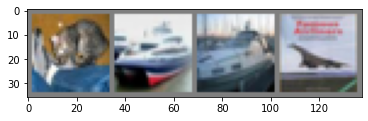

In [50]:
# get some test images
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%4s' % classes[labels[j]] for j in range(4)))

outputs = predictor.predict(images.numpy())

_, predicted = torch.max(torch.from_numpy(np.array(outputs)), 1)

print('Predicted: ', ' '.join('%4s' % classes[predicted[j]]
                              for j in range(4)))

In [29]:
%load_ext autoreload

%autoreload 2

In [ ]:
# bytearray(images.numpy())

In [ ]:
GroundTruth:   cat ship ship plane
---------------------------------------------------------------------------
ModelError                                Traceback (most recent call last)
<ipython-input-28-fc765e16b373> in <module>
      7 print('GroundTruth: ', ' '.join('%4s' % classes[labels[j]] for j in range(4)))
      8 
----> 9 outputs = predictor.predict(images.numpy())
     10 
     11 _, predicted = torch.max(torch.from_numpy(np.array(outputs)), 1)

~/anaconda3/envs/pytorch_latest_p36/lib/python3.6/site-packages/sagemaker/predictor.py in predict(self, data, initial_args, target_model, target_variant, inference_id)
    159             data, initial_args, target_model, target_variant, inference_id
    160         )
--> 161         response = self.sagemaker_session.sagemaker_runtime_client.invoke_endpoint(**request_args)
    162         return self._handle_response(response)
    163 

~/anaconda3/envs/pytorch_latest_p36/lib/python3.6/site-packages/botocore/client.py in _api_call(self, *args, **kwargs)
    389                     "%s() only accepts keyword arguments." % py_operation_name)
    390             # The "self" in this scope is referring to the BaseClient.
--> 391             return self._make_api_call(operation_name, kwargs)
    392 
    393         _api_call.__name__ = str(py_operation_name)

~/anaconda3/envs/pytorch_latest_p36/lib/python3.6/site-packages/botocore/client.py in _make_api_call(self, operation_name, api_params)
    717             error_code = parsed_response.get("Error", {}).get("Code")
    718             error_class = self.exceptions.from_code(error_code)
--> 719             raise error_class(parsed_response, operation_name)
    720         else:
    721             return parsed_response

ModelError: An error occurred (ModelError) when calling the InvokeEndpoint operation: Received server error (0) from primary with message "Your invocation timed out while waiting for a response from container primary. Review the latency metrics for each container in Amazon CloudWatch, resolve the issue, and try again.". See https://us-west-2.console.aws.amazon.com/cloudwatch/home?region=us-west-2#logEventViewer:group=/aws/sagemaker/Endpoints/cifar10-pytorch-spot-1-2022-02-09-06-32-58-349 in account 113935906496 for more information.



In [ ]:
# dataiter = iter(testloader)
# images, labels = dataiter.next()

# #print images
# imshow(torchvision.utils.make_grid(images))
# print('GroundTruth: ', ' '.join('%4s' % classes[labels[j]] for j in range(4)))

# outputs = predictor.predict(images.numpy())

# _,predicted = torch.max(torch.from_numpy(np.array(outputs)), 1)

# print('Predicted: ', ' '.join('%4s' % classes[predicted[j]] for j in range(4)))

In [ ]:
predictor.delete_endpoint()

In [ ]:
images.numpy().shape

In [ ]:
ModelError                                Traceback (most recent call last)
<ipython-input-23-feddf718001d> in <module>
      6 print('GroundTruth: ', ' '.join('%4s' % classes[labels[j]] for j in range(4)))
      7 
----> 8 outputs = predictor.predict(images.numpy())
      9 
     10 _,predicted = torch.max(torch.from_numpy(np.array(outputs)), 1)

~/anaconda3/envs/pytorch_latest_p36/lib/python3.6/site-packages/sagemaker/predictor.py in predict(self, data, initial_args, target_model, target_variant, inference_id)
    159             data, initial_args, target_model, target_variant, inference_id
    160         )
--> 161         response = self.sagemaker_session.sagemaker_runtime_client.invoke_endpoint(**request_args)
    162         return self._handle_response(response)
    163 

~/anaconda3/envs/pytorch_latest_p36/lib/python3.6/site-packages/botocore/client.py in _api_call(self, *args, **kwargs)
    389                     "%s() only accepts keyword arguments." % py_operation_name)
    390             # The "self" in this scope is referring to the BaseClient.
--> 391             return self._make_api_call(operation_name, kwargs)
    392 
    393         _api_call.__name__ = str(py_operation_name)

~/anaconda3/envs/pytorch_latest_p36/lib/python3.6/site-packages/botocore/client.py in _make_api_call(self, operation_name, api_params)
    717             error_code = parsed_response.get("Error", {}).get("Code")
    718             error_class = self.exceptions.from_code(error_code)
--> 719             raise error_class(parsed_response, operation_name)
    720         else:
    721             return parsed_response

ModelError: An error occurred (ModelError) when calling the InvokeEndpoint operation: Received server error (0) from primary with message "Your invocation timed out while waiting for a response from container primary. Review the latency metrics for each container in Amazon CloudWatch, resolve the issue, and try again.". See https://us-west-2.console.aws.amazon.com/cloudwatch/home?region=us-west-2#logEventViewer:group=/aws/sagemaker/Endpoints/cifar10-pytorch-spot-1-2022-02-09-06-12-51-016 in account 113935906496 for more information.

In [28]:
images.numpy().shape

(4, 3, 32, 32)

In [ ]:
2022-02-09 04:40:57 Starting - Starting the training job...
2022-02-09 04:41:19 Starting - Launching requested ML instancesProfilerReport-1644381656: InProgress
.........
2022-02-09 04:42:39 Starting - Preparing the instances for training......
2022-02-09 04:43:47 Downloading - Downloading input data
2022-02-09 04:43:47 Training - Downloading the training image..................
2022-02-09 04:46:42 Training - Training image download completed. Training in progress.bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2022-02-09 04:46:42,870 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2022-02-09 04:46:42,912 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2022-02-09 04:46:42,922 sagemaker_pytorch_container.training INFO     Invoking user training script.
2022-02-09 04:46:43,457 sagemaker-training-toolkit INFO     Invoking user script
Training Env:
{
    "additional_framework_parameters": {},
    "channel_input_dirs": {
        "training": "/opt/ml/input/data/training"
    },
    "current_host": "algo-1",
    "framework_module": "sagemaker_pytorch_container.training:main",
    "hosts": [
        "algo-1"
    ],
    "hyperparameters": {
        "epochs": 4
    },
    "input_config_dir": "/opt/ml/input/config",
    "input_data_config": {
        "training": {
            "TrainingInputMode": "File",
            "S3DistributionType": "FullyReplicated",
            "RecordWrapperType": "None"
        }
    },
    "input_dir": "/opt/ml/input",
    "is_master": true,
    "job_name": "cifar10-pytorch-spot-1-2022-02-09-04-40-56-428",
    "log_level": 20,
    "master_hostname": "algo-1",
    "model_dir": "/opt/ml/model",
    "module_dir": "s3://sagemaker-us-west-2-113935906496/cifar10-pytorch-spot-1-2022-02-09-04-40-56-428/source/sourcedir.tar.gz",
    "module_name": "cifar10",
    "network_interface_name": "eth0",
    "num_cpus": 32,
    "num_gpus": 4,
    "output_data_dir": "/opt/ml/output/data",
    "output_dir": "/opt/ml/output",
    "output_intermediate_dir": "/opt/ml/output/intermediate",
    "resource_config": {
        "current_host": "algo-1",
        "hosts": [
            "algo-1"
        ],
        "network_interface_name": "eth0"
    },
    "user_entry_point": "cifar10.py"
}
Environment variables:
SM_HOSTS=["algo-1"]
SM_NETWORK_INTERFACE_NAME=eth0
SM_HPS={"epochs":4}
SM_USER_ENTRY_POINT=cifar10.py
SM_FRAMEWORK_PARAMS={}
SM_RESOURCE_CONFIG={"current_host":"algo-1","hosts":["algo-1"],"network_interface_name":"eth0"}
SM_INPUT_DATA_CONFIG={"training":{"RecordWrapperType":"None","S3DistributionType":"FullyReplicated","TrainingInputMode":"File"}}
SM_OUTPUT_DATA_DIR=/opt/ml/output/data
SM_CHANNELS=["training"]
SM_CURRENT_HOST=algo-1
SM_MODULE_NAME=cifar10
SM_LOG_LEVEL=20
SM_FRAMEWORK_MODULE=sagemaker_pytorch_container.training:main
SM_INPUT_DIR=/opt/ml/input
SM_INPUT_CONFIG_DIR=/opt/ml/input/config
SM_OUTPUT_DIR=/opt/ml/output
SM_NUM_CPUS=32
SM_NUM_GPUS=4
SM_MODEL_DIR=/opt/ml/model
SM_MODULE_DIR=s3://sagemaker-us-west-2-113935906496/cifar10-pytorch-spot-1-2022-02-09-04-40-56-428/source/sourcedir.tar.gz
SM_TRAINING_ENV={"additional_framework_parameters":{},"channel_input_dirs":{"training":"/opt/ml/input/data/training"},"current_host":"algo-1","framework_module":"sagemaker_pytorch_container.training:main","hosts":["algo-1"],"hyperparameters":{"epochs":4},"input_config_dir":"/opt/ml/input/config","input_data_config":{"training":{"RecordWrapperType":"None","S3DistributionType":"FullyReplicated","TrainingInputMode":"File"}},"input_dir":"/opt/ml/input","is_master":true,"job_name":"cifar10-pytorch-spot-1-2022-02-09-04-40-56-428","log_level":20,"master_hostname":"algo-1","model_dir":"/opt/ml/model","module_dir":"s3://sagemaker-us-west-2-113935906496/cifar10-pytorch-spot-1-2022-02-09-04-40-56-428/source/sourcedir.tar.gz","module_name":"cifar10","network_interface_name":"eth0","num_cpus":32,"num_gpus":4,"output_data_dir":"/opt/ml/output/data","output_dir":"/opt/ml/output","output_intermediate_dir":"/opt/ml/output/intermediate","resource_config":{"current_host":"algo-1","hosts":["algo-1"],"network_interface_name":"eth0"},"user_entry_point":"cifar10.py"}
SM_USER_ARGS=["--epochs","4"]
SM_OUTPUT_INTERMEDIATE_DIR=/opt/ml/output/intermediate
SM_CHANNEL_TRAINING=/opt/ml/input/data/training
SM_HP_EPOCHS=4
PYTHONPATH=/opt/ml/code:/opt/conda/bin:/opt/conda/lib/python36.zip:/opt/conda/lib/python3.6:/opt/conda/lib/python3.6/lib-dynload:/opt/conda/lib/python3.6/site-packages
Invoking script with the following command:
/opt/conda/bin/python3.6 cifar10.py --epochs 4
Checkpointing directory /opt/ml/checkpoints exists
Device Type: cuda
Loading Cifar10 dataset
Model loaded
Gpu count: 4
NCCL version 2.7.8+cuda11.0
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth
#015  0%|          | 0.00/83.3M [00:00<?, ?B/s]#015  3%|▎         | 2.53M/83.3M [00:00<00:03, 26.5MB/s]#015  6%|▌         | 5.06M/83.3M [00:00<00:03, 26.4MB/s]#015  8%|▊         | 6.94M/83.3M [00:00<00:03, 23.8MB/s]#015 10%|█         | 8.62M/83.3M [00:00<00:03, 21.5MB/s]#015 12%|█▏        | 10.3M/83.3M [00:00<00:03, 20.1MB/s]#015 15%|█▌        | 12.8M/83.3M [00:00<00:03, 21.5MB/s]#015 18%|█▊        | 15.2M/83.3M [00:00<00:03, 22.4MB/s]#015 21%|██        | 17.6M/83.3M [00:00<00:02, 23.2MB/s]#015 24%|██▍       | 20.2M/83.3M [00:00<00:02, 24.4MB/s]#015 27%|██▋       | 22.8M/83.3M [00:01<00:02, 24.9MB/s]#015 30%|███       | 25.2M/83.3M [00:01<00:02, 25.2MB/s]#015 33%|███▎      | 27.8M/83.3M [00:01<00:02, 25.4MB/s]#015 36%|███▌      | 30.2M/83.3M [00:01<00:02, 25.1MB/s]#015 39%|███▉      | 32.5M/83.3M [00:01<00:02, 24.4MB/s]#015 42%|████▏     | 34.9M/83.3M [00:01<00:02, 24.6MB/s]#015 45%|████▍     | 37.4M/83.3M [00:01<00:01, 24.9MB/s]#015 48%|████▊     | 39.8M/83.3M [00:01<00:01, 24.7MB/s]#015 51%|█████     | 42.2M/83.3M [00:01<00:01, 24.4MB/s]#015 54%|█████▎    | 44.6M/83.3M [00:01<00:01, 24.7MB/s]#015 56%|█████▋    | 47.0M/83.3M [00:02<00:01, 24.7MB/s]#015 59%|█████▉    | 49.5M/83.3M [00:02<00:01, 25.0MB/s]#015 63%|██████▎   | 52.1M/83.3M [00:02<00:01, 25.6MB/s]#015 66%|██████▌   | 54.6M/83.3M [00:02<00:01, 25.5MB/s]#015 68%|██████▊   | 57.0M/83.3M [00:02<00:01, 25.2MB/s]#015 71%|███████▏  | 59.4M/83.3M [00:02<00:01, 24.9MB/s]#015 74%|███████▍  | 62.0M/83.3M [00:02<00:00, 25.4MB/s]#015 77%|███████▋  | 64.5M/83.3M [00:02<00:00, 25.5MB/s]#015 80%|████████  | 66.9M/83.3M [00:02<00:00, 25.5MB/s]#015 83%|████████▎ | 69.4M/83.3M [00:02<00:00, 24.8MB/s]#015 86%|████████▋ | 71.9M/83.3M [00:03<00:00, 25.4MB/s]#015 89%|████████▉ | 74.4M/83.3M [00:03<00:00, 25.1MB/s]#015 92%|█████████▏| 76.9M/83.3M [00:03<00:00, 25.2MB/s]#015 96%|█████████▌| 79.6M/83.3M [00:03<00:00, 25.8MB/s]#015 99%|█████████▊| 82.0M/83.3M [00:03<00:00, 25.6MB/s]#015100%|██████████| 83.3M/83.3M [00:03<00:00, 24.7MB/s]
Traceback (most recent call last):
  File "cifar10.py", line 194, in <module>
    _train(parser.parse_args([]))
  File "cifar10.py", line 108, in _train
    outputs = model(inputs)
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/modules/module.py", line 756, in _call_impl
    result = self.forward(*input, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/parallel/data_parallel.py", line 161, in forward
    outputs = self.parallel_apply(replicas, inputs, kwargs)
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/parallel/data_parallel.py", line 171, in parallel_apply
    return parallel_apply(replicas, inputs, kwargs, self.device_ids[:len(replicas)])
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/parallel/parallel_apply.py", line 86, in parallel_apply
    output.reraise()
  File "/opt/conda/lib/python3.6/site-packages/torch/_utils.py", line 428, in reraise
    raise self.exc_type(msg)
ValueError: Caught ValueError in replica 0 on device 0.
Original Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/parallel/parallel_apply.py", line 61, in _worker
    output = module(*input, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/modules/module.py", line 756, in _call_impl
    result = self.forward(*input, **kwargs)
  File "cifar10.py", line 34, in forward
    out = self.model(x)
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/modules/module.py", line 756, in _call_impl
    result = self.forward(*input, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/torchvision/models/resnet.py", line 220, in forward
    return self._forward_impl(x)
  File "/opt/conda/lib/python3.6/site-packages/torchvision/models/resnet.py", line 211, in _forward_impl
    x = self.layer4(x)
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/modules/module.py", line 756, in _call_impl
    result = self.forward(*input, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py", line 117, in forward
    input = module(input)
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/modules/module.py", line 756, in _call_impl
    result = self.forward(*input, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/torchvision/models/resnet.py", line 60, in forward
    out = self.bn1(out)
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/modules/module.py", line 756, in _call_impl
    result = self.forward(*input, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/modules/batchnorm.py", line 136, in forward
    self.weight, self.bias, bn_training, exponential_average_factor, self.eps)
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/functional.py", line 2054, in batch_norm
    _verify_batch_size(input.size())
2022-02-09 04:47:10,976 sagemaker-training-toolkit ERROR    ExecuteUserScriptError:
Command "/opt/conda/bin/python3.6 cifar10.py --epochs 4"
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth
#015  0%|          | 0.00/83.3M [00:00<?, ?B/s]#015  3%|â         | 2.53M/83.3M [00:00<00:03, 26.5MB/s]#015  6%|â         | 5.06M/83.3M [00:00<00:03, 26.4MB/s]#015  8%|â         | 6.94M/83.3M [00:00<00:03, 23.8MB/s]#015 10%|â         | 8.62M/83.3M [00:00<00:03, 21.5MB/s]#015 12%|ââ        | 10.3M/83.3M [00:00<00:03, 20.1MB/s]#015 15%|ââ        | 12.8M/83.3M [00:00<00:03, 21.5MB/s]#015 18%|ââ        | 15.2M/83.3M [00:00<00:03, 22.4MB/s]#015 21%|ââ        | 17.6M/83.3M [00:00<00:02, 23.2MB/s]#015 24%|âââ       | 20.2M/83.3M [00:00<00:02, 24.4MB/s]#015 27%|âââ       | 22.8M/83.3M [00:01<00:02, 24.9MB/s]#015 30%|âââ       | 25.2M/83.3M [00:01<00:02, 25.2MB/s]#015 33%|ââââ      | 27.8M/83.3M [00:01<00:02, 25.4MB/s]#015 36%|ââââ      | 30.2M/83.3M [00:01<00:02, 25.1MB/s]#015 39%|ââââ      | 32.5M/83.3M [00:01<00:02, 24.4MB/s]#015 42%|âââââ     | 34.9M/83.3M [00:01<00:02, 24.6MB/s]#015 45%|âââââ     | 37.4M/83.3M [00:01<00:01, 24.9MB/s]#015 48%|âââââ     | 39.8M/83.3M [00:01<00:01, 24.7MB/s]#015 51%|âââââ     | 42.2M/83.3M [00:01<00:01, 24.4MB/s]#015 54%|ââââââ    | 44.6M/83.3M [00:01<00:01, 24.7MB/s]#015 56%|ââââââ    | 47.0M/83.3M [00:02<00:01, 24.7MB/s]#015 59%|ââââââ    | 49.5M/83.3M [00:02<00:01, 25.0MB/s]#015 63%|âââââââ   | 52.1M/83.3M [00:02<00:01, 25.6MB/s]#015 66%|âââââââ   | 54.6M/83.3M [00:02<00:01, 25.5MB/s]#015 68%|âââââââ   | 57.0M/83.3M [00:02<00:01, 25.2MB/s]#015 71%|ââââââââ  | 59.4M/83.3M [00:02<00:01, 24.9MB/s]#015 74%|ââââââââ  | 62.0M/83.3M [00:02<00:00, 25.4MB/s]#015 77%|ââââââââ  | 64.5M/83.3M [00:02<00:00, 25.5MB/s]#015 80%|ââââââââ  | 66.9M/83.3M [00:02<00:00, 25.5MB/s]#015 83%|âââââââââ | 69.4M/83.3M [00:02<00:00, 24.8MB/s]#015 86%|âââââââââ | 71.9M/83.3M [00:03<00:00, 25.4MB/s]#015 89%|âââââââââ | 74.4M/83.3M [00:03<00:00, 25.1MB/s]#015 92%|ââââââââââ| 76.9M/83.3M [00:03<00:00, 25.2MB/s]#015 96%|ââââââââââ| 79.6M/83.3M [00:03<00:00, 25.8MB/s]#015 99%|ââââââââââ| 82.0M/83.3M [00:03<00:00, 25.6MB/s]#015100%|ââââââââââ| 83.3M/83.3M [00:03<00:00, 24.7MB/s]
Traceback (most recent call last):
  File "cifar10.py", line 194, in <module>
    _train(parser.parse_args([]))
  File "cifar10.py", line 108, in _train
    outputs = model(inputs)
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/modules/module.py", line 756, in _call_impl
    result = self.forward(*input, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/parallel/data_parallel.py", line 161, in forward
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/functional.py", line 2037, in _verify_batch_size
    raise ValueError('Expected more than 1 value per channel when training, got input size {}'.format(size))
ValueError: Expected more than 1 value per channel when training, got input size torch.Size([1, 512, 1, 1])
    outputs = self.parallel_apply(replicas, inputs, kwargs)
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/parallel/data_parallel.py", line 171, in parallel_apply
    return parallel_apply(replicas, inputs, kwargs, self.device_ids[:len(replicas)])
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/parallel/parallel_apply.py", line 86, in parallel_apply
    output.reraise()
  File "/opt/conda/lib/python3.6/site-packages/torch/_utils.py", line 428, in reraise
    raise self.exc_type(msg)
ValueError: Caught ValueError in replica 0 on device 0.
Original Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/parallel/parallel_apply.py", line 61, in _worker
    output = module(*input, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/modules/module.py", line 756, in _call_impl
    result = self.forward(*input, **kwargs)
  File "cifar10.py", line 34, in forward
    out = self.model(x)
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/modules/module.py", line 756, in _call_impl
    result = self.forward(*input, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/torchvision/models/resnet.py", line 220, in forward
    return self._forward_impl(x)
  File "/opt/conda/lib/python3.6/site-packages/torchvision/models/resnet.py", line 211, in _forward_impl
    x = self.layer4(x)
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/modules/module.py", line 756, in _call_impl
    result = self.forward(*input, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py", line 117, in forward
    input = module(input)
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/modules/module.py", line 756, in _call_impl
    result = self.forward(*input, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/torchvision/models/resnet.py", line 60, in forward
    out = self.bn1(out)
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/modules/module.py", line 756, in _call_impl
    result = self.forward(*input, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/modules/batchnorm.py", line 136, in forward
    self.weight, self.bias, bn_training, exponential_average_factor, self.eps)
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/functional.py", line 2054, in batch_norm
    _verify_batch_size(input.size())
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/functional.py", line 2037, in _verify_batch_size
    raise ValueError('Expected more than 1 value per channel when training, got input size {}'.format(size))
ValueError: Expected more than 1 value per channel when training, got input size torch.Size([1, 512, 1, 1])

2022-02-09 04:47:22 Uploading - Uploading generated training model
2022-02-09 04:47:22 Failed - Training job failed
ProfilerReport-1644381656: Stopping
---------------------------------------------------------------------------
UnexpectedStatusException                 Traceback (most recent call last)
<ipython-input-8-195b0f68deca> in <module>
----> 1 spot_estimator.fit(inputs)

~/anaconda3/envs/pytorch_latest_p36/lib/python3.6/site-packages/sagemaker/estimator.py in fit(self, inputs, wait, logs, job_name, experiment_config)
    690         self.jobs.append(self.latest_training_job)
    691         if wait:
--> 692             self.latest_training_job.wait(logs=logs)
    693 
    694     def _compilation_job_name(self):

~/anaconda3/envs/pytorch_latest_p36/lib/python3.6/site-packages/sagemaker/estimator.py in wait(self, logs)
   1665         # If logs are requested, call logs_for_jobs.
   1666         if logs != "None":
-> 1667             self.sagemaker_session.logs_for_job(self.job_name, wait=True, log_type=logs)
   1668         else:
   1669             self.sagemaker_session.wait_for_job(self.job_name)

~/anaconda3/envs/pytorch_latest_p36/lib/python3.6/site-packages/sagemaker/session.py in logs_for_job(self, job_name, wait, poll, log_type)
   3783 
   3784         if wait:
-> 3785             self._check_job_status(job_name, description, "TrainingJobStatus")
   3786             if dot:
   3787                 print()

~/anaconda3/envs/pytorch_latest_p36/lib/python3.6/site-packages/sagemaker/session.py in _check_job_status(self, job, desc, status_key_name)
   3341                 ),
   3342                 allowed_statuses=["Completed", "Stopped"],
-> 3343                 actual_status=status,
   3344             )
   3345 

UnexpectedStatusException: Error for Training job cifar10-pytorch-spot-1-2022-02-09-04-40-56-428: Failed. Reason: AlgorithmError: ExecuteUserScriptError:
Command "/opt/conda/bin/python3.6 cifar10.py --epochs 4"
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth
 36%|ââââ      | 30.2M/83.3M [00:01<00:02, 25.1MB/s]


In [ ]:
model = torchvision.models.resnet34(pretrained=True)

In [ ]:
model

In [ ]:
model.fc = torch.nn.Linear(512, 10)

In [ ]:
model

In [ ]:
# mpi_options = {
#     "enabled": True,
#    "processes_per_host": 4,
#    "custom_mpi_options":"--mca btl_vader_single_copy_mechanism none "
#   }
  
# dist_options = {
#     "smdistributed": 
#      {
#         "modelparallel": 
#          {
#             "enabled": True,
#             "parameters": {}
#           }
#      }
#  }

In [ ]:
# Provided instance_type ml.p3.8xlarge is not supported by smdataparallel.
# Please specify one of the supported instance types:('ml.p3.16xlarge', 'ml.p3dn.24xlarge', 'ml.p4d.24xlarge', 'local_gpu')

In [ ]:
/opt/conda/lib/python3.6/site-packages/pytorch_lightning/trainer/connectors/callback_connector.py:91: LightningDeprecationWarning: Setting `Trainer(progress_bar_refresh_rate=10)` is deprecated in v1.5 and will be removed in v1.7. Please pass `pytorch_lightning.callbacks.progress.TQDMProgressBar` with `refresh_rate` directly to the Trainer's `callbacks` argument instead. Or, to disable the progress bar pass `enable_progress_bar = False` to the Trainer.
  f"Setting `Trainer(progress_bar_refresh_rate={progress_bar_refresh_rate})` is deprecated in v1.5 and"
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/opt/conda/lib/python3.6/site-packages/pytorch_lightning/core/datamodule.py:115: LightningDeprecationWarning: DataModule property `train_transforms` was deprecated in v1.5 and will be removed in v1.7.
  "DataModule property `train_transforms` was deprecated in v1.5 and will be removed in v1.7."
/opt/conda/lib/python3.6/site-packages/pytorch_lightning/core/datamodule.py:134: LightningDeprecationWarning: DataModule property `val_transforms` was deprecated in v1.5 and will be removed in v1.7.
  "DataModule property `val_transforms` was deprecated in v1.5 and will be removed in v1.7."
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
  | Name  | Type                | Params
----------------------------------------------
0 | model | create_resnet_model | 21.3 M
----------------------------------------------
21.3 M    Trainable params
0         Non-trainable params
21.3 M    Total params
85.159    Total estimated model params size (MB)
/opt/conda/lib/python3.6/site-packages/pytorch_lightning/trainer/data_loading.py:133: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 32 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."
/opt/conda/lib/python3.6/site-packages/pytorch_lightning/trainer/data_loading.py:133: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 32 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."
/opt/conda/lib/python3.6/site-packages/pytorch_lightning/core/datamodule.py:153: LightningDeprecationWarning: DataModule property `test_transforms` was deprecated in v1.5 and will be removed in v1.7.
  "DataModule property `test_transforms` was deprecated in v1.5 and will be removed in v1.7."
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
/opt/conda/lib/python3.6/site-packages/pytorch_lightning/trainer/data_loading.py:133: UserWarning: The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 32 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."
Traceback (most recent call last):
  File "cifar_10_ptl.py", line 212, in <module>
    main_train_loop(args)
  File "cifar_10_ptl.py", line 183, in main_train_loop
    trainer.test(model, datamodule=cifar10_dm)
  File "/opt/conda/lib/python3.6/site-packages/pytorch_lightning/trainer/trainer.py", line 911, in test
    return self._call_and_handle_interrupt(self._test_impl, model, dataloaders, ckpt_path, verbose, datamodule)
  File "/opt/conda/lib/python3.6/site-packages/pytorch_lightning/trainer/trainer.py", line 685, in _call_and_handle_interrupt
    return trainer_fn(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/pytorch_lightning/trainer/trainer.py", line 954, in _test_impl
    results = self._run(model, ckpt_path=self.tested_ckpt_path)
  File "/opt/conda/lib/python3.6/site-packages/pytorch_lightning/trainer/trainer.py", line 1199, in _run
    self._dispatch()
  File "/opt/conda/lib/python3.6/site-packages/pytorch_lightning/trainer/trainer.py", line 1275, in _dispatch
    self.training_type_plugin.start_evaluating(self)
  File "/opt/conda/lib/python3.6/site-packages/pytorch_lightning/plugins/training_type/training_type_plugin.py", line 206, in start_evaluating
    self._results = trainer.run_stage()
  File "/opt/conda/lib/python3.6/site-packages/pytorch_lightning/trainer/trainer.py", line 1286, in run_stage
2022-02-16 03:10:48,922 sagemaker-training-toolkit ERROR    ExecuteUserScriptError:
Command "/opt/conda/bin/python3.6 cifar_10_ptl.py"
/opt/conda/lib/python3.6/site-packages/pytorch_lightning/core/datamodule.py:74: LightningDeprecationWarning: DataModule property `train_transforms` was deprecated in v1.5 and will be removed in v1.7.
  "DataModule property `train_transforms` was deprecated in v1.5 and will be removed in v1.7."
/opt/conda/lib/python3.6/site-packages/pytorch_lightning/core/datamodule.py:78: LightningDeprecationWarning: DataModule property `val_transforms` was deprecated in v1.5 and will be removed in v1.7.
    return self._run_evaluate()
  "DataModule property `val_transforms` was deprecated in v1.5 and will be removed in v1.7."
  File "/opt/conda/lib/python3.6/site-packages/pytorch_lightning/trainer/trainer.py", line 1334, in _run_evaluate
    eval_loop_results = self._evaluation_loop.run()
  File "/opt/conda/lib/python3.6/site-packages/pytorch_lightning/loops/base.py", line 145, in run
    self.advance(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/pytorch_lightning/loops/dataloader/evaluation_loop.py", line 110, in advance
    dl_outputs = self.epoch_loop.run(dataloader, dataloader_idx, dl_max_batches, self.num_dataloaders)
  File "/opt/conda/lib/python3.6/site-packages/pytorch_lightning/loops/base.py", line 145, in run
    self.advance(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/pytorch_lightning/loops/epoch/evaluation_epoch_loop.py", line 122, in advance
    output = self._evaluation_step(batch, batch_idx, dataloader_idx)
  File "/opt/conda/lib/python3.6/site-packages/pytorch_lightning/loops/epoch/evaluation_epoch_loop.py", line 213, in _evaluation_step
/opt/conda/lib/python3.6/site-packages/pytorch_lightning/core/datamodule.py:82: LightningDeprecationWarning: DataModule property `test_transforms` was deprecated in v1.5 and will be removed in v1.7.
    output = self.trainer.accelerator.test_step(step_kwargs)
  File "/opt/conda/lib/python3.6/site-packages/pytorch_lightning/accelerators/accelerator.py", line 247, in test_step
    return self.training_type_plugin.test_step(*step_kwargs.values())
  File "/opt/conda/lib/python3.6/site-packages/pytorch_lightning/plugins/training_type/dp.py", line 107, in test_step
    return self.model(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/modules/module.py", line 756, in _call_impl
  "DataModule property `test_transforms` was deprecated in v1.5 and will be removed in v1.7."
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth
#015  0%|          | 0.00/83.3M [00:00<?, ?B/s]#015  3%|â         | 2.41M/83.3M [00:00<00:03, 25.3MB/s]#015  4%|â         | 3.56M/83.3M [00:00<00:04, 18.9MB/s]#015  7%|â         | 6.19M/83.3M [00:00<00:03, 20.8MB/s]#015 10%|â         | 8.00M/83.3M [00:00<00:03, 20.2MB/s]#015 11%|ââ        | 9.51M/83.3M [00:00<00:04, 16.4MB/s]#015 13%|ââ        | 10.9M/83.3M [00:00<00:04, 15.4MB/s]#015 16%|ââ        | 13.3M/83.3M [00:00<00:04, 17.4MB/s]#015 18%|ââ        | 15.1M/83.3M [00:00<00:04, 17.8MB/s]#015 21%|ââ        | 17.7M/83.3M [00:00<00:03, 19.9MB/s]#015 24%|âââ       | 20.2M/83.3M [00:01<00:03, 21.5MB/s]#015 27%|âââ       | 22.5M/83.3M [00:01<00:02, 22.1MB/s]#015 30%|âââ       | 24.9M/83.3M [00:01<00:02, 22.9MB/s]#015 33%|ââââ      | 27.5M/83.3M [00:01<00:02, 24.0MB/s]#015 36%|ââââ      | 29.8M/83.3M [00:01<00:02, 22.6MB/s]#015 38%|ââââ      | 32.0M/83.3M [00:01<00:02, 22.2MB/s]#015 41%|âââââ     | 34.4M/83.3M [00:01<00:02, 22.6MB/s]#015 44%|âââââ     | 36.7M/83.3M [00:01<00:02, 23.0MB/s]#015 47%|âââââ     | 39.2M/83.3M [00:01<00:01, 23.8MB/s]#015 50%|âââââ     | 41.8M/83.3M [00:01<00:01, 24.6MB/s]#015 53%|ââââââ    | 44.2M/83.3M [00:02<00:01, 24.8MB/s]#015 56%|ââââââ    | 46.8M/83.3M [00:02<00:01, 25.4MB/s]#015 59%|ââââââ    | 49.3M/83.3M [00:02<00:01, 25.4MB/s]#015 62%|âââââââ   | 51.7M/83.3M [00:02<00:01, 24.4MB/s]#015 65%|âââââââ   | 54.3M/83.3M [00:02<00:01, 25.2MB/s]#015 68%|âââââââ   | 56.8M/83.3M [00:02<00:01, 25.4MB/s]#015 71%|âââââââ   | 59.2M/83.3M [00:02<00:01, 24.5MB/s]#015 74%|ââââââââ  | 61.6M/83.3M [00:02<00:00, 23.2MB/s]#015 77%|ââââââââ  | 63.8M/83.3M [00:02<00:00, 22.8MB/s]#015 80%|ââââââââ  | 66.3M/83.3M [00:03<00:00, 23.3MB/s]#015 83%|âââââââââ | 69.0M/83.3M [00:03<00:00, 24.5MB/s]#015 86%|âââââââââ | 71.3M/83.3M [00:03<00:00, 23.7MB/s]#015 89%|âââââââââ | 73.7M/83.3M [00:03<00:00, 23.5MB/s]#015 91%|ââââââââââ| 76.1M/83.3M [00:03<00:00, 23.9MB/s]#015 94%|ââââââââââ| 78.6M/83.3M [00:03<00:00, 24.5MB/s]#015 97%|ââââââââââ| 81.0M/83.3M [00:03<00:00, 24.6MB/s]#015100%|ââââââââââ| 83.3M/83.3M [00:03<00:00, 23.0MB/s]
/opt/conda/lib/python3.6/site-packages/pytorch_lightning/trainer/connectors/callback_connector.py:91: LightningDeprecationWarning: Setting `Trainer(progress_bar_refresh_rate=10)` is deprecated in v1.5 and will be removed in v1.7. Please pass `pytorch_lightning.callbacks.progress.TQDMProgressBar` with `refresh_rate` directly to the Trainer's `callbacks` argument instead. Or, to disable the progress bar pass `enable_progress_bar = False` to the Trainer.
    result = self.forward(*input, **kwargs)
  f"Setting `Trainer(progress_bar_refresh_rate={progress_bar_refresh_rate})` is deprecated in v1.5 and"
GPU available: True, used: True
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/parallel/data_parallel.py", line 161, in forward
    outputs = self.parallel_apply(replicas, inputs, kwargs)
TPU available: False, using: 0 TPU cores
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/parallel/data_parallel.py", line 171, in parallel_apply
    return parallel_apply(replicas, inputs, kwargs, self.device_ids[:len(replicas)])
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/parallel/parallel_apply.py", line 86, in parallel_apply
    output.reraise()
  File "/opt/conda/lib/python3.6/site-packages/torch/_utils.py", line 428, in reraise
    raise self.exc_type(msg)
RuntimeError: Caught RuntimeError in replica 2 on device 2.
IPU available: False, using: 0 IPUs
/opt/conda/lib/python3.6/site-packages/pytorch_lightning/core/datamodule.py:115: LightningDeprecationWarning: DataModule property `train_transforms` was deprecated in v1.5 and will be removed in v1.7.
  "DataModule property `train_transforms` was deprecated in v1.5 and will be removed in v1.7."
/opt/conda/lib/python3.6/site-packages/pytorch_lightning/core/datamodule.py:134: LightningDeprecationWarning: DataModule property `val_transforms` was deprecated in v1.5 and will be removed in v1.7.
  "DataModule property `val_transforms` was deprecated in v1.5 and will be removed in v1.7."
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
  | Name  | Type                | Params
----------------------------------------------
0 | model | create_resnet_model | 21.3 M
----------------------------------------------
Original Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/parallel/parallel_apply.py", line 61, in _worker
    output = module(*input, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/modules/module.py", line 756, in _call_impl
    result = self.forward(*input, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/pytorch_lightning/overrides/data_parallel.py", line 63, in forward
    output = super().forward(*inputs, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/pytorch_lightning/overrides/base.py", line 90, in forward
    output = self.module.test_step(*inputs, **kwargs)
  File "cifar_10_ptl.py", line 115, in test_step
    self.evaluate(batch, "test")
  File "cifar_10_ptl.py", line 108, in evaluate
    self.log(f"{stage}_loss", loss, prog_bar=True)
  File "/opt/conda/lib/python3.6/site-packages/pytorch_lightning/core/lightning.py", line 448, in log
    results.reset(metrics=False, fx=self._current_fx_name)
  File "/opt/conda/lib/python3.6/site-packages/pytorch_lightning/trainer/connectors/logger_connector/result.py", line 611, in reset
    apply_to_collection(self, ResultMetric, fn)
  File "/opt/conda/lib/python3.6/site-packages/pytorch_lightning/utilities/apply_func.py", line 103, in apply_to_collection
    for k, v in data.items():
RuntimeError: dictionary changed size during iteration
21.3 M    Trainable params
0         Non-trainable params
21.3 M    Total params
85.159    Total estimated model params size (MB)
/opt/conda/lib/python3.6/site-packages/pytorch_lightning/trainer/data_loading.py:133: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 32 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."
/opt/conda/lib/python3.6/site-packages/pytorch_lightning/trainer/data_loading.py:133: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 32 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."
Exception ignored in: <object repr() failed>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/tqdm/std.py", line 1128, in __del__
  File "/opt/conda/lib/python3.6/site-packages/tqdm/std.py", line 1341, in close
  File "/opt/conda/lib/python3.6/site-packages/tqdm/std.py", line 1520, in display
  File "/opt/conda/lib/python3.6/site-packages/tqdm/std.py", line 1131, in __repr__
  File "/opt/conda/lib/python3.6/site-packages/tqdm/std.py", line 1481, in format_dict
TypeError: 'NoneType' object is not iterable
/opt/conda/lib/python3.6/site-packages/pytorch_lightning/core/datamodule.py:153: LightningDeprecationWarning: DataModule property `test_transforms` was deprecated in v1.5 and will be removed in v1.7.
  "DataModule property `test_transforms` was deprecated in v1.5 and will be removed in v1.7."
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
/opt/conda/lib/python3.6/site-packages/pytorch_lightning/trainer/data_loading.py:133: UserWarning: The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 32 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."
Traceback (most recent call last):
  File "cifar_10_ptl.py", line 212, in <module>
    main_train_loop(args)
  File "cifar_10_ptl.py", line 183, in main_train_loop
    trainer.test(model, datamodule=cifar10_dm)
  File "/opt/conda/lib/python3.6/site-packages/pytorch_lightning/trainer/trainer.py", line 911, in test
    return self._call_and_handle_interrupt(self._test_impl, model, dataloaders, ckpt_path, verbose, datamodule)
  File "/opt/conda/lib/python3.6/site-packages/pytorch_lightning/trainer/trainer.py", line 685, in _call_and_handle_interrupt
    return trainer_fn(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/pytorch_lightning/trainer/trainer.py", line 954, in _test_impl
    results = self._run(model, ckpt_path=self.tested_ckpt_path)
  File "/opt/conda/lib/python3.6/site-packages/pytorch_lightning/trainer/trainer.py", line 1199, in _run
    self._dispatch()
  File "/opt/conda/lib/python3.6/site-packages/pytorch_lightning/trainer/trainer.py", line 1275, in _dispatch
    self.training_type_plugin.start_evaluating(self)
  File "/opt/conda/lib/python3.6/site-packages/pytorch_lightning/plugins/training_type/training_type_plugin.py", line 206, in start_evaluating
    self._results = trainer.run_stage()
  File "/opt/conda/lib/python3.6/site-packages/pytorch_lightning/trainer/trainer.py", line 1286, in run_stage
    return self._run_evaluate()
  File "/opt/conda/lib/python3.6/site-packages/pytorch_lightning/trainer/trainer.py", line 1334, in _run_evaluate
    eval_loop_results = self._evaluation_loop.run()
  File "/opt/conda/lib/python3.6/site-packages/pytorch_lightning/loops/base.py", line 145, in run
    self.advance(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/pytorch_lightning/loops/dataloader/evaluation_loop.py", line 110, in advance
    dl_outputs = self.epoch_loop.run(dataloader, dataloader_idx, dl_max_batches, self.num_dataloaders)
  File "/opt/conda/lib/python3.6/site-packages/pytorch_lightning/loops/base.py", line 145, in run
    self.advance(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/pytorch_lightning/loops/epoch/evaluation_epoch_loop.py", line 122, in advance
    output = self._evaluation_step(batch, batch_idx, dataloader_idx)
  File "/opt/conda/lib/python3.6/site-packages/pytorch_lightning/loops/epoch/evaluation_epoch_loop.py", line 213, in _evaluation_step
    output = self.trainer.accelerator.test_step(step_kwargs)
  File "/opt/conda/lib/python3.6/site-packages/pytorch_lightning/accelerators/accelerator.py", line 247, in test_step
    return self.training_type_plugin.test_step(*step_kwargs.values())
  File "/opt/conda/lib/python3.6/site-packages/pytorch_lightning/plugins/training_type/dp.py", line 107, in test_step
    return self.model(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/modules/module.py", line 756, in _call_impl
    result = self.forward(*input, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/parallel/data_parallel.py", line 161, in forward
    outputs = self.parallel_apply(replicas, inputs, kwargs)
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/parallel/data_parallel.py", line 171, in parallel_apply
    return parallel_apply(replicas, inputs, kwargs, self.device_ids[:len(replicas)])
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/parallel/parallel_apply.py", line 86, in parallel_apply
    output.reraise()
  File "/opt/conda/lib/python3.6/site-packages/torch/_utils.py", line 428, in reraise
    raise self.exc_type(msg)
RuntimeError: Caught RuntimeError in replica 2 on device 2.
Original Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/parallel/parallel_apply.py", line 61, in _worker
    output = module(*input, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/modules/module.py", line 756, in _call_impl
    result = self.forward(*input, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/pytorch_lightning/overrides/data_parallel.py", line 63, in forward
    output = super().forward(*inputs, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/pytorch_lightning/overrides/base.py", line 90, in forward
    output = self.module.test_step(*inputs, **kwargs)
  File "cifar_10_ptl.py", line 115, in test_step
    self.evaluate(batch, "test")
  File "cifar_10_ptl.py", line 108, in evaluate
    self.log(f"{stage}_loss", loss, prog_bar=True)
  File "/opt/conda/lib/python3.6/site-packages/pytorch_lightning/core/lightning.py", line 448, in log
    results.reset(metrics=False, fx=self._current_fx_name)
  File "/opt/conda/lib/python3.6/site-packages/pytorch_lightning/trainer/connectors/logger_connector/result.py", line 611, in reset
    apply_to_collection(self, ResultMetric, fn)
  File "/opt/conda/lib/python3.6/site-packages/pytorch_lightning/utilities/apply_func.py", line 103, in apply_to_collection
    for k, v in data.items():
RuntimeError: dictionary changed size during iteration
Exception ignored in: <object repr() failed>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/tqdm/std.py", line 1128, in __del__
  File "/opt/conda/lib/python3.6/site-packages/tqdm/std.py", line 1341, in close
  File "/opt/conda/lib/python3.6/site-packages/tqdm/std.py", line 1520, in display
  File "/opt/conda/lib/python3.6/site-packages/tqdm/std.py", line 1131, in __repr__
  File "/opt/conda/lib/python3.6/site-packages/tqdm/std.py", line 1481, in format_dict
TypeError: 'NoneType' object is not iterable

2022-02-16 03:11:26 Failed - Training job failed
ProfilerReport-1644980290: Stopping
---------------------------------------------------------------------------
UnexpectedStatusException                 Traceback (most recent call last)
<ipython-input-9-195b0f68deca> in <module>
----> 1 spot_estimator.fit(inputs)

~/anaconda3/envs/pytorch_latest_p36/lib/python3.6/site-packages/sagemaker/estimator.py in fit(self, inputs, wait, logs, job_name, experiment_config)
    690         self.jobs.append(self.latest_training_job)
    691         if wait:
--> 692             self.latest_training_job.wait(logs=logs)
    693 
    694     def _compilation_job_name(self):

~/anaconda3/envs/pytorch_latest_p36/lib/python3.6/site-packages/sagemaker/estimator.py in wait(self, logs)
   1665         # If logs are requested, call logs_for_jobs.
   1666         if logs != "None":
-> 1667             self.sagemaker_session.logs_for_job(self.job_name, wait=True, log_type=logs)
   1668         else:
   1669             self.sagemaker_session.wait_for_job(self.job_name)

~/anaconda3/envs/pytorch_latest_p36/lib/python3.6/site-packages/sagemaker/session.py in logs_for_job(self, job_name, wait, poll, log_type)
   3783 
   3784         if wait:
-> 3785             self._check_job_status(job_name, description, "TrainingJobStatus")
   3786             if dot:
   3787                 print()

~/anaconda3/envs/pytorch_latest_p36/lib/python3.6/site-packages/sagemaker/session.py in _check_job_status(self, job, desc, status_key_name)
   3341                 ),
   3342                 allowed_statuses=["Completed", "Stopped"],
-> 3343                 actual_status=status,
   3344             )
   3345 

UnexpectedStatusException: Error for Training job cifar10-pytorch-spot-1-2022-02-16-02-58-09-738: Failed. Reason: AlgorithmError: ExecuteUserScriptError:
Command "/opt/conda/bin/python3.6 cifar_10_ptl.py"
/opt/conda/lib/python3.6/site-packages/pytorch_lightning/core/datamodule.py:74: LightningDeprecationWarning: DataModule property `train_transforms` was deprecated in v1.5 and will be removed in v1.7.
  "DataModule property `train_transforms` was deprecated in v1.5 and will be removed in v1.7."
/opt/conda/lib/python3.6/site-packages/pytorch_lightning/core/datamodule.py:78: LightningDeprecationWarning: DataModule property `val_transforms` was deprecated in v1.5 and will be removed in v1.7.
  "DataModule property `val_transforms` was deprecated in v1.5 and will be removed in v1.7."
/opt/conda/lib/python3.6/site-packages/pytorch_lightning/core/datamodule.py:82: LightningDeprecationWarning: DataModule property `test_transforms` was deprecated in v1.5 and will be removed in v1.7.
  "DataModule property `test_transforms` was deprecated in v1.5 and will be removed in v1.7."
Downloading: "https://download.pytorch.org/models/resn
